## Data Understanding

In [39]:
#Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Data/Terry_Stops.csv')
data

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-8,20220000063036,32023419019,Field Contact,-,6805,1973,M,White,...,09:34:02.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,WEST PCT 1ST W - KQ/DM RELIEF,N,Y,West,K,K3
1,-,-8,20220000233868,35877423282,Field Contact,-,8881,1988,M,Asian,...,19:20:16.0000000,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),--DISTURBANCE - OTHER,911,TRAINING - FIELD TRAINING SQUAD,N,Y,South,O,O1
2,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00.0000000,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
3,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,07:59:00.0000000,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,19:12:00.0000000,-,-,-,NaN,N,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53649,56 and Above,35908211663,20220000238170,35908320953,Field Contact,-,8889,1977,M,White,...,04:11:19.0000000,"DISTURBANCE, MISCELLANEOUS/OTHER","DISTURBANCE, MISCELLANEOUS/OTHER",911,TRAINING - FIELD TRAINING SQUAD,N,N,West,Q,Q3
53650,56 and Above,36244081163,20220000243193,36244016178,Arrest,-,8857,1996,M,White,...,01:53:14.0000000,-,-,-,WEST PCT 2ND W - D/M RELIEF,Y,N,East,E,E3
53651,56 and Above,36540999080,20220000250573,36541078424,Field Contact,-,6805,1973,M,White,...,12:57:21.0000000,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--MISCHIEF OR NUISANCE - GENERAL,ONVIEW,WEST PCT 1ST W - KQ/DM RELIEF,N,N,West,K,K3
53652,56 and Above,36545542648,20220000251229,36545507606,Field Contact,-,7773,1978,M,White,...,02:33:21.0000000,FOUND - PERSON,FOUND - PERSON,911,NORTH PCT 3RD W - LINCOLN,N,N,North,J,J3



The data can be lumped into four categories:

#### Demographics: race, age, gender

#### Situation: weapons involved, date, time

#### Administrative: report type, precinct, officer squad, officer IDs

#### Outcome: arrest, citation, field contact, offense report


There are 53654 rows and 23 columns in our dataset. Below is a brief description of the data each column represents:

#### Subject Age Group
Subject Age Group (10 year increments) as reported by the officer.
  
#### Subject ID
Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification.
    
#### GO/SC Num
General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.
    
#### Terry Stop ID
Key identifying unique Terry Stop reports.

#### Stop Resolution
Resolution of the stop as reported by the officer.
    
#### Weapon Type
Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None"     if no weapons was found.
    
#### Officer ID
Key identifying unique officers in the dataset.
    
#### Officer YOB: 
Year of birth, as reported by the officer.
    
#### Officer Gender
Gender of the officer, as reported by the officer.
    
#### Officer Race
Race of the officer, as reported by the officer.
    
#### Subject Perceived Race
Perceived race of the subject, as reported by the officer.

#### Subject Perceived Gender
Perceived gender of the subject, as reported by the officer.
    
#### Reported Date
Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.
    
#### Reported Time
Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.
    
#### Initial Call Type
Initial classification of the call as assigned by 911.
    
#### Final Call Type
Final classification of the call as assigned by the primary officer closing the event.
    
#### Call Type
How the call was received by the communication center.
    
#### Officer Squad
Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).
    
#### Arrest Flag
Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).
    
#### Frisk Flag
Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.
    
#### Precinct
Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.
    
#### Sector
Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.
    
#### Beat
Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.


In [3]:
data['Stop Resolution'].value_counts()

Field Contact               23006
Offense Report              16599
Arrest                      13131
Referred for Prosecution      728
Citation / Infraction         190
Name: Stop Resolution, dtype: int64

In [4]:
data['Reported Time']

0        09:34:02.0000000
1        19:20:16.0000000
2        11:32:00.0000000
3        07:59:00.0000000
4        19:12:00.0000000
               ...       
53649    04:11:19.0000000
53650    01:53:14.0000000
53651    12:57:21.0000000
53652    02:33:21.0000000
53653    23:21:54.0000000
Name: Reported Time, Length: 53654, dtype: object

In [5]:
data['Precinct'].value_counts()

West         14070
North        11699
-            10240
East          6904
South         6363
Southwest     2320
SouthWest     1775
Unknown        200
OOJ             61
FK ERROR        22
Name: Precinct, dtype: int64

In [6]:
data['Frisk Flag'].value_counts(normalize=True)

N    0.760316
Y    0.230775
-    0.008909
Name: Frisk Flag, dtype: float64

In [7]:
data['Subject Age Group'].value_counts(normalize=True)

26 - 35         0.334178
36 - 45         0.216834
18 - 25         0.195922
46 - 55         0.128434
56 and Above    0.051851
1 - 17          0.038767
-               0.034014
Name: Subject Age Group, dtype: float64

In [8]:
data['Officer YOB'].value_counts(normalize=True)

1986    0.068774
1987    0.063779
1991    0.055522
1984    0.054441
1992    0.053193
1990    0.050099
1985    0.048459
1988    0.044657
1989    0.042345
1982    0.036269
1983    0.034778
1993    0.033101
1995    0.031983
1979    0.031964
1981    0.029653
1994    0.025087
1971    0.023707
1976    0.023223
1978    0.022757
1977    0.020520
1973    0.018731
1996    0.017930
1980    0.017426
1967    0.014761
1997    0.013904
1970    0.012487
1968    0.012376
1969    0.010996
1974    0.010791
1975    0.010791
1962    0.008629
1964    0.008555
1972    0.008368
1965    0.007902
1963    0.004939
1966    0.004380
1961    0.004361
1958    0.004138
1959    0.003243
1960    0.003001
1998    0.002292
1900    0.001286
1954    0.000820
1957    0.000801
1953    0.000652
1999    0.000466
2000    0.000429
1955    0.000391
1956    0.000317
1948    0.000205
1952    0.000168
1949    0.000093
1946    0.000037
1951    0.000019
Name: Officer YOB, dtype: float64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53654 entries, 0 to 53653
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         53654 non-null  object
 1   Subject ID                53654 non-null  int64 
 2   GO / SC Num               53654 non-null  int64 
 3   Terry Stop ID             53654 non-null  int64 
 4   Stop Resolution           53654 non-null  object
 5   Weapon Type               53654 non-null  object
 6   Officer ID                53654 non-null  object
 7   Officer YOB               53654 non-null  int64 
 8   Officer Gender            53654 non-null  object
 9   Officer Race              53654 non-null  object
 10  Subject Perceived Race    53654 non-null  object
 11  Subject Perceived Gender  53654 non-null  object
 12  Reported Date             53654 non-null  object
 13  Reported Time             53654 non-null  object
 14  Initial Call Type     

In [10]:
data.shape

(53654, 23)

In [11]:
#descriptive statistics for numeric columns
data.describe()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,5.365400e+04,5.365400e+04,5.365400e+04,53654.000000
mean,4.343049e+09,2.018040e+13,6.931744e+09,1983.457356
std,7.565102e+09,8.960437e+10,1.081950e+10,9.312311
min,-8.000000e+00,-1.000000e+00,2.802000e+04,1900.000000
25%,-1.000000e+00,2.016000e+13,2.074660e+05,1979.000000
50%,-1.000000e+00,2.018000e+13,4.544425e+05,1986.000000
75%,7.731599e+09,2.020000e+13,1.262118e+10,1990.000000
max,3.743051e+10,2.022000e+13,3.742961e+10,2000.000000


In [12]:
data.isnull().sum()

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               489
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

In [13]:
data['Subject Age Group'].value_counts()
#There are missing values

26 - 35         17930
36 - 45         11634
18 - 25         10512
46 - 55          6891
56 and Above     2782
1 - 17           2080
-                1825
Name: Subject Age Group, dtype: int64

In [14]:
data['Terry Stop ID'].duplicated().sum()
#we have 73 duplicates

73

In [15]:
data['Stop Resolution'].value_counts()

Field Contact               23006
Offense Report              16599
Arrest                      13131
Referred for Prosecution      728
Citation / Infraction         190
Name: Stop Resolution, dtype: int64

In [16]:
data['Weapon Type'].value_counts()
#we have missing values
#further investigate 'personal weapons'

None                                    32565
-                                       17800
Lethal Cutting Instrument                1482
Knife/Cutting/Stabbing Instrument         967
Handgun                                   342
Blunt Object/Striking Implement           125
Firearm Other                             100
Firearm                                    63
Club, Blackjack, Brass Knuckles            49
Mace/Pepper Spray                          44
Other Firearm                              41
Firearm (unk type)                         15
Taser/Stun Gun                             13
Fire/Incendiary Device                     11
None/Not Applicable                        10
Club                                        9
Rifle                                       8
Shotgun                                     4
Automatic Handgun                           2
Personal Weapons (hands, feet, etc.)        2
Brass Knuckles                              1
Blackjack                         

In [17]:
data['Officer YOB'].value_counts()
#no missing values

1986    3690
1987    3422
1991    2979
1984    2921
1992    2854
1990    2688
1985    2600
1988    2396
1989    2272
1982    1946
1983    1866
1993    1776
1995    1716
1979    1715
1981    1591
1994    1346
1971    1272
1976    1246
1978    1221
1977    1101
1973    1005
1996     962
1980     935
1967     792
1997     746
1970     670
1968     664
1969     590
1974     579
1975     579
1962     463
1964     459
1972     449
1965     424
1963     265
1966     235
1961     234
1958     222
1959     174
1960     161
1998     123
1900      69
1954      44
1957      43
1953      35
1999      25
2000      23
1955      21
1956      17
1948      11
1952       9
1949       5
1946       2
1951       1
Name: Officer YOB, dtype: int64

In [18]:
data['Reported Time'].value_counts()
#we will feature engineer a new column of day/night to predict time of day that most Terry Stops were made.

02:56:00.0000000    52
17:00:00.0000000    51
03:09:00.0000000    51
19:18:00.0000000    51
03:13:00.0000000    50
                    ..
04:00:34.0000000     1
21:37:35.0000000     1
06:46:43.0000000     1
02:52:18.0000000     1
23:21:54.0000000     1
Name: Reported Time, Length: 18104, dtype: int64

In [19]:
data['Arrest Flag'].value_counts()
#this is our target variable

N    48731
Y     4923
Name: Arrest Flag, dtype: int64

In [20]:
data['Frisk Flag'].value_counts()
#we have missing values
#this will be used to check whether there was a terry stop and a frisk that led to the discovery of a weapon

N    40794
Y    12382
-      478
Name: Frisk Flag, dtype: int64

In [21]:
data['Precinct'].value_counts()

West         14070
North        11699
-            10240
East          6904
South         6363
Southwest     2320
SouthWest     1775
Unknown        200
OOJ             61
FK ERROR        22
Name: Precinct, dtype: int64

## Data Preparation

### Validity

In [22]:
data.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

In [23]:
relevant_columns=['Subject Age Group', 'Terry Stop ID','Stop Resolution', 'Weapon Type', 'Officer YOB', 
                   'Reported Date', 'Reported Time', 'Arrest Flag', 'Frisk Flag']
terry_stops = data[relevant_columns]
terry_stops

,Subject Age Group,Terry Stop ID,Stop Resolution,Weapon Type,Officer YOB,Reported Date,Reported Time,Arrest Flag,Frisk Flag
0,-,32023419019,Field Contact,-,1973,2022-03-14T00:00:00Z,09:34:02.0000000,N,Y
1,-,35877423282,Field Contact,-,1988,2022-09-02T00:00:00Z,19:20:16.0000000,N,Y
2,-,92317,Arrest,None,1984,2015-10-16T00:00:00Z,11:32:00.0000000,N,N
3,-,28806,Field Contact,None,1965,2015-03-19T00:00:00Z,07:59:00.0000000,N,N
4,-,29599,Field Contact,None,1961,2015-03-21T00:00:00Z,19:12:00.0000000,N,-
...,...,...,...,...,...,...,...,...,...
53649,56 and Above,35908320953,Field Contact,-,1977,2022-09-07T00:00:00Z,04:11:19.0000000,N,N
53650,56 and Above,36244016178,Arrest,-,1996,2022-09-12T00:00:00Z,01:53:14.0000000,Y,N
53651,56 and Above,36541078424,Field Contact,-,1973,2022-09-19T00:00:00Z,12:57:21.0000000,N,N
53652,56 and Above,36545507606,Field Contact,-,1978,2022-09-20T00:00:00Z,02:33:21.0000000,N,N


In [24]:
terry_stops['Terry Stop ID'].duplicated().sum()

73

In [25]:
#we removed duplicated rows
terry_stops = terry_stops.drop_duplicates(subset='Terry Stop ID', keep='first')
terry_stops['Terry Stop ID'].duplicated().sum()

0

In [26]:
#Since we are done checking for duplicates we can now drop the column we used to check as it is no longer important
terry_stops.drop("Terry Stop ID", axis = 1,inplace=True)

/var/folders/nn/vxj31dzx2ws_fw98wqh_r6wh0000gp/T/ipykernel_5412/3301809096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terry_stops.drop("Terry Stop ID", axis = 1,inplace=True)


### Uniformity

In [27]:
terry_stops.columns = terry_stops.columns.str.replace(" ", "_")

terry_stops= terry_stops.rename(columns=str.lower)

terry_stops


,subject_age_group,stop_resolution,weapon_type,officer_yob,reported_date,reported_time,arrest_flag,frisk_flag
0,-,Field Contact,-,1973,2022-03-14T00:00:00Z,09:34:02.0000000,N,Y
1,-,Field Contact,-,1988,2022-09-02T00:00:00Z,19:20:16.0000000,N,Y
2,-,Arrest,None,1984,2015-10-16T00:00:00Z,11:32:00.0000000,N,N
3,-,Field Contact,None,1965,2015-03-19T00:00:00Z,07:59:00.0000000,N,N
4,-,Field Contact,None,1961,2015-03-21T00:00:00Z,19:12:00.0000000,N,-
...,...,...,...,...,...,...,...,...
53649,56 and Above,Field Contact,-,1977,2022-09-07T00:00:00Z,04:11:19.0000000,N,N
53650,56 and Above,Arrest,-,1996,2022-09-12T00:00:00Z,01:53:14.0000000,Y,N
53651,56 and Above,Field Contact,-,1973,2022-09-19T00:00:00Z,12:57:21.0000000,N,N
53652,56 and Above,Field Contact,-,1978,2022-09-20T00:00:00Z,02:33:21.0000000,N,N


In [28]:
#creating a new column for officer age
terry_stops['officer_age']= 2022- terry_stops['officer_yob']
#drop the column for officer year of birth
terry_stops.drop('officer_yob', axis=1, inplace=True)

In [29]:
#we are replacing the 122 year olds with the modal age
age_mode = terry_stops["officer_age"].mode()
terry_stops["officer_age"].replace({122:age_mode[0]},inplace=True)
terry_stops["officer_age"].sort_values(ascending=False)

4245     76
5704     76
51120    74
4915     74
44630    74
         ..
43512    22
28873    22
32218    22
41497    22
26790    22
Name: officer_age, Length: 53581, dtype: int64

### Completeness

In [30]:
#we replaced blanks with 'unknown'
terry_stops['subject_age_group'].replace({'-': 'Unknown'}, inplace=True)
terry_stops['subject_age_group'].value_counts()

26 - 35         17906
36 - 45         11617
18 - 25         10496
46 - 55          6881
56 and Above     2777
1 - 17           2079
Unknown          1825
Name: subject_age_group, dtype: int64

In [31]:
terry_stops['reported_date']= terry_stops['reported_date'].apply(lambda x:x[:10])

terry_stops['reported_date'] = pd.to_datetime(terry_stops['reported_date'])

terry_stops['reported_date'] = pd.DatetimeIndex(terry_stops['reported_date']).month

terry_stops['reported_date'].replace(
        {1: 'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September',
        10:'October', 11:'November', 12:'December'
        }, inplace = True)
terry_stops['reported_date']


0            March
1        September
2          October
3            March
4            March
           ...    
53649    September
53650    September
53651    September
53652    September
53653    September
Name: reported_date, Length: 53581, dtype: object

In [32]:
terry_stops['reported_time']= terry_stops['reported_time'].apply(lambda x:x[:2])
terry_stops['reported_time']= terry_stops['reported_time'].astype('int')

In [33]:
terry_stops['reported_time'].replace(
        {1: 'Night', 2:'Night', 3:'Night', 4:'Night', 5:'Night', 6:'Night', 7:'Day', 8:'Day', 9:'Day',
        10:'Day', 11:'Day', 12:'Day', 13:'Day', 14:'Day', 15:'Day', 16:'Day', 17:'Day',
        18:'Day', 19:'Night', 20:'Night', 21:'Night', 22:'Night', 23:'Night', 24:'Night', 0:'Night'
        }, inplace = True)

In [34]:
terry_stops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53581 entries, 0 to 53653
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subject_age_group  53581 non-null  object
 1   stop_resolution    53581 non-null  object
 2   weapon_type        53581 non-null  object
 3   reported_date      53581 non-null  object
 4   reported_time      53581 non-null  object
 5   arrest_flag        53581 non-null  object
 6   frisk_flag         53581 non-null  object
 7   officer_age        53581 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 3.7+ MB


In [35]:
terry_stops['weapon_type'].replace({'-' : 'None', 'Lethal Cutting Instrument': 'Non-Firearm','Knife/Cutting/Stabbing Instrument': 'Non-Firearm', 'Handgun' : 'Firearm', 'Blunt Object/Striking Implement': 'Non-Firearm',
                          'Firearm Other':'Firearm', 'Club, Blackjack, Brass Knuckles': 'Non-Firearm', 'Mace/Pepper Spray': 'Non-Firearm',
                          'Other Firearm': 'Firearm', 'Firearm (unk type)':'Firearm', 'Taser/Stun Gun':'Non-Firearm', 'Fire/Incendiary Device':'Non-Firearm',
                          'None/Not Applicable':'None', 'Club':'Non-Firearm', 'Rifle':'Firearm', 'Shotgun':'Firearm', 'Automatic Handgun':'Firearm',
                          'Personal Weapons (hands, feet, etc.)':'Non-Firearm', 'Brass Knuckles':'Non-Firearm', 'Blackjack':'Non-Firearm' }, inplace = True)
terry_stops['weapon_type'].value_counts()

None           50375
Non-Firearm     2642
Firearm          564
Name: weapon_type, dtype: int64

In [36]:
# # we replaced 
# terry_stops['weapon_type'].replace({'-': 'None', 'None/Not Applicable':'None', 
#                                     'Personal Weapons (hands, feet, etc.)': 'None'}, inplace=True)
# terry_stops['weapon_type'].value_counts()

In [37]:
#replacing missing values with N
terry_stops["frisk_flag"].replace({"-":"N"},inplace = True)


In [38]:
terry_stops.head()

,subject_age_group,stop_resolution,weapon_type,reported_date,reported_time,arrest_flag,frisk_flag,officer_age
0,Unknown,Field Contact,None,March,Day,N,Y,49
1,Unknown,Field Contact,None,September,Night,N,Y,34
2,Unknown,Arrest,None,October,Day,N,N,38
3,Unknown,Field Contact,None,March,Day,N,N,57
4,Unknown,Field Contact,None,March,Night,N,N,61


## Exploratory Data Analysis (EDA)
   
 ### Univariate Analysis

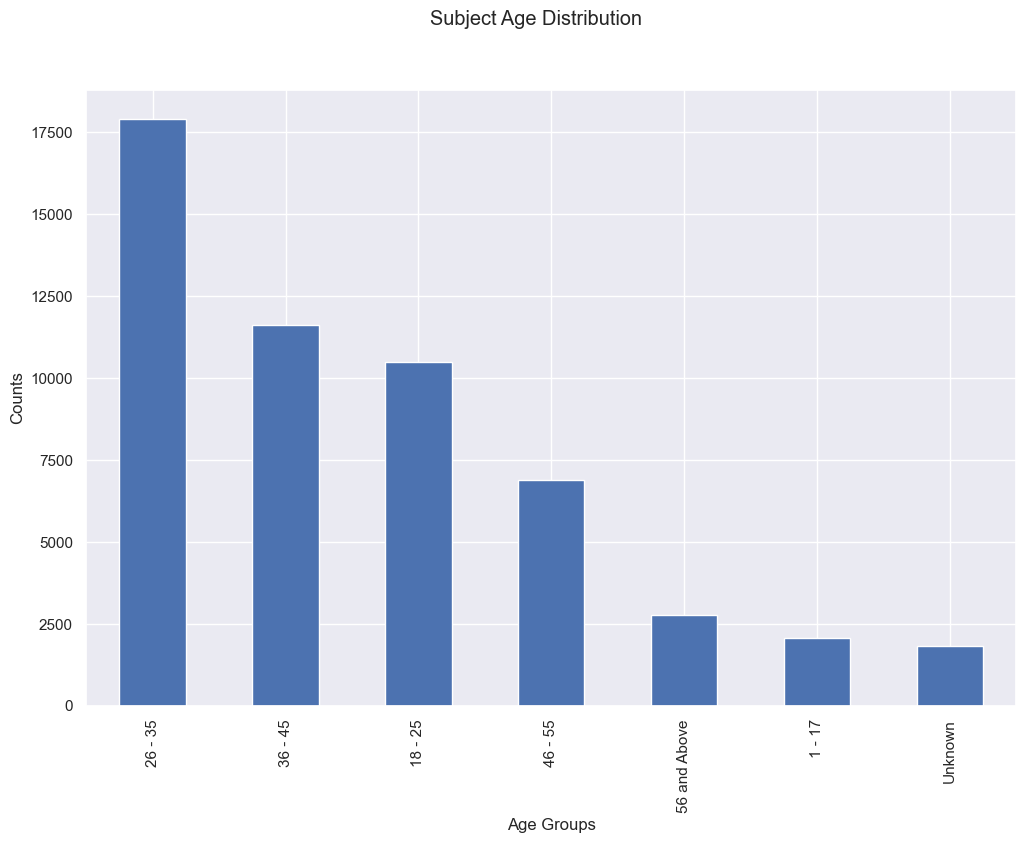

In [65]:
plt.figure(figsize=(12,8))
terry_stops['subject_age_group'].value_counts().plot(kind='bar')
plt.suptitle("Subject Age Distribution")
plt.xlabel("Age Groups")
plt.ylabel("Counts")
plt.show()

In [66]:
terry_stops.columns

Index(['subject_age_group', 'stop_resolution', 'weapon_type', 'reported_date',
       'reported_time', 'arrest_flag', 'frisk_flag', 'officer_age'],
      dtype='object')

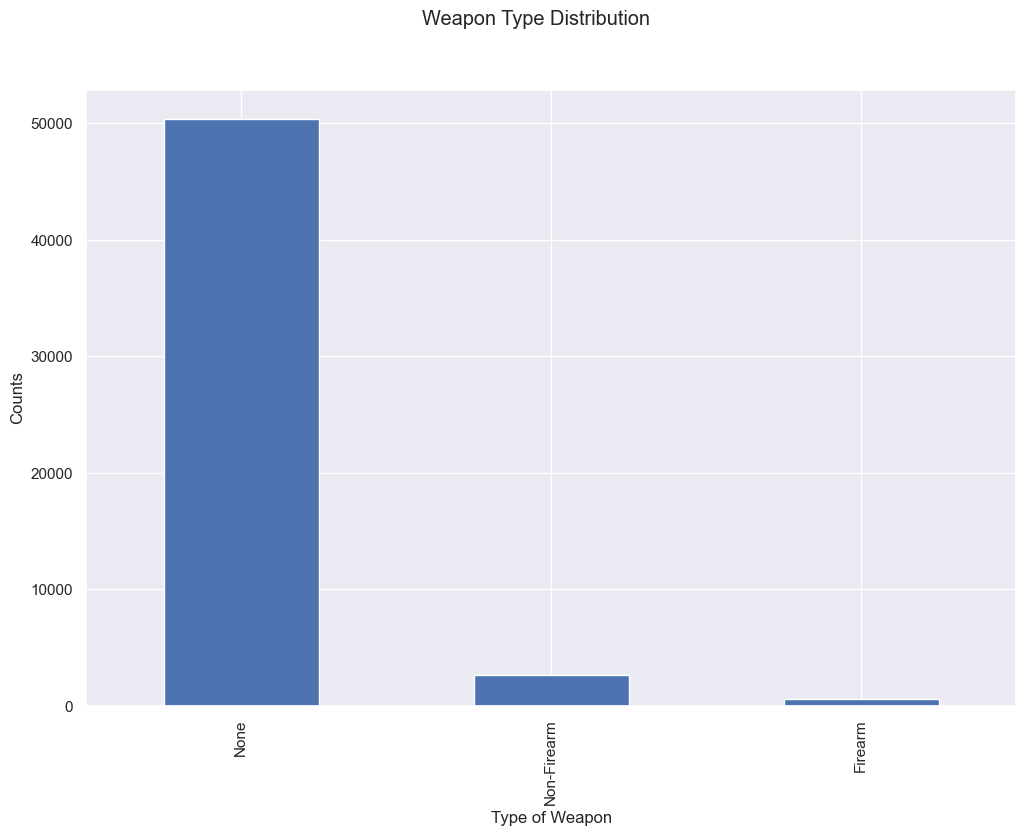

In [69]:
plt.figure(figsize=(12,8))
terry_stops['weapon_type'].value_counts().plot(kind='bar')
plt.suptitle("Weapon Type Distribution")
plt.xlabel("Type of Weapon")
plt.ylabel("Counts")
plt.show()

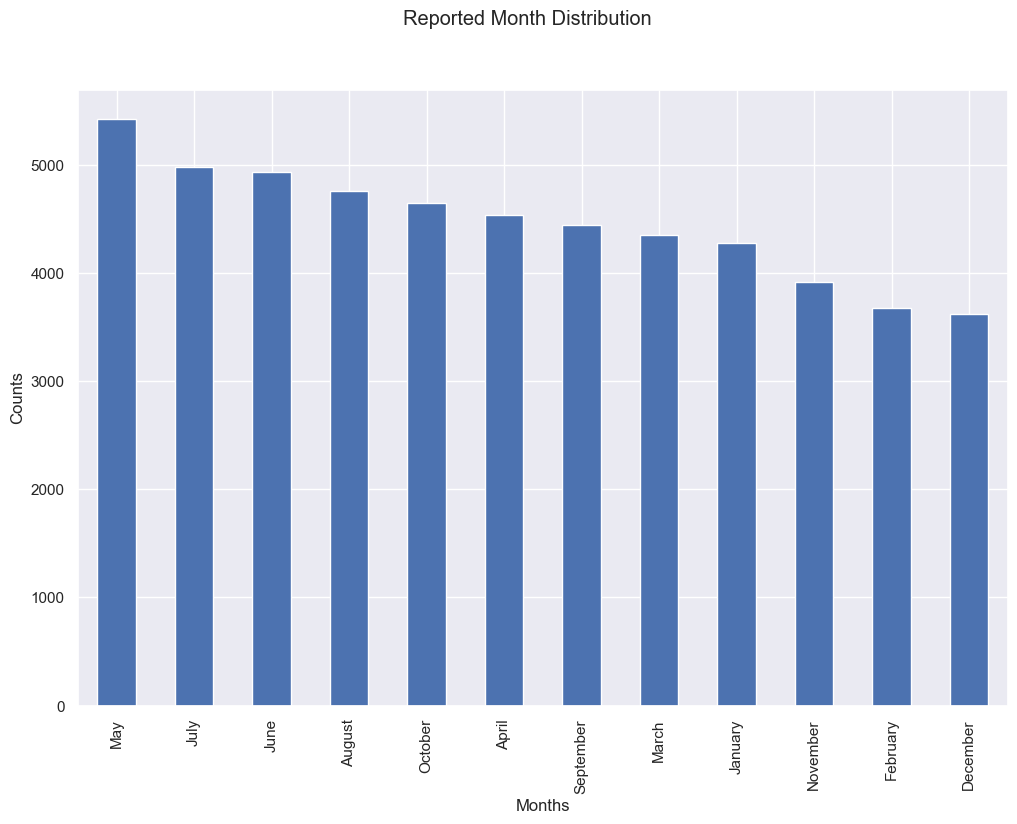

In [70]:
plt.figure(figsize=(12,8))
terry_stops['reported_date'].value_counts().plot(kind='bar')
plt.suptitle("Reported Month Distribution")
plt.xlabel("Months")
plt.ylabel("Counts")
plt.show()

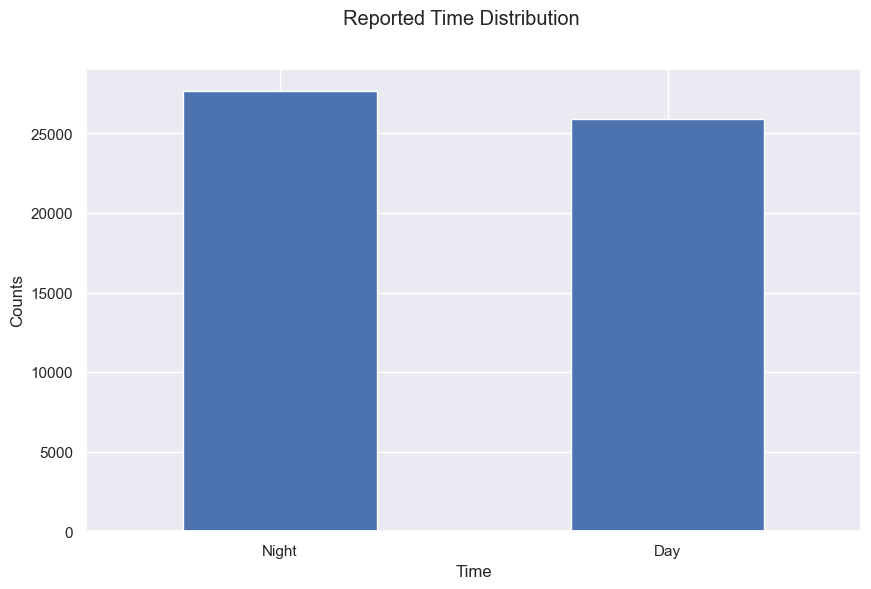

In [80]:
plt.figure(figsize=(10,6))
terry_stops['reported_time'].value_counts().plot(kind='bar')
plt.suptitle("Reported Time Distribution")
plt.xlabel("Time")
plt.ylabel("Counts")
plt.xticks(rotation=0)
plt.show()

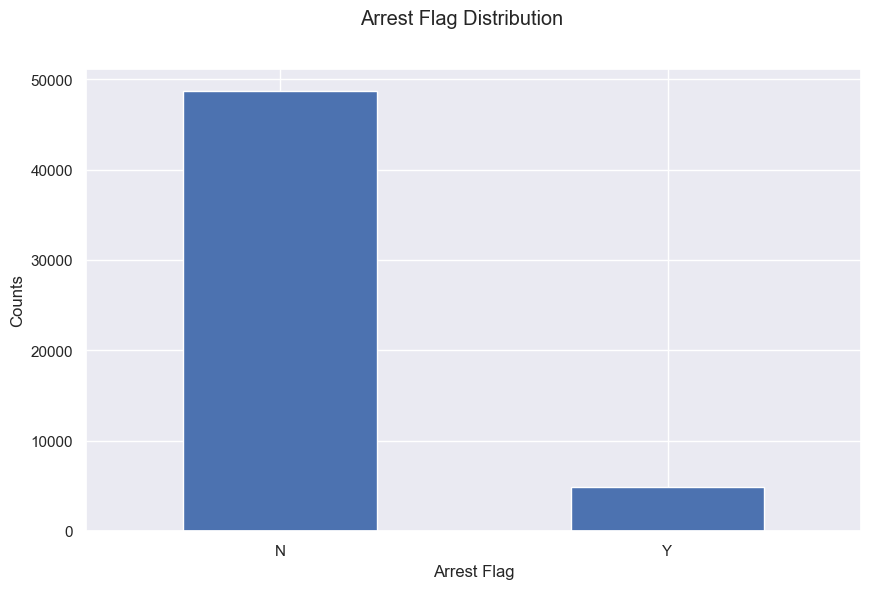

In [79]:
plt.figure(figsize=(10,6))
terry_stops['arrest_flag'].value_counts().plot(kind='bar')
plt.suptitle("Arrest Flag Distribution")
plt.xlabel("Arrest Flag")
plt.xticks(rotation=0)
plt.ylabel("Counts")
plt.show()

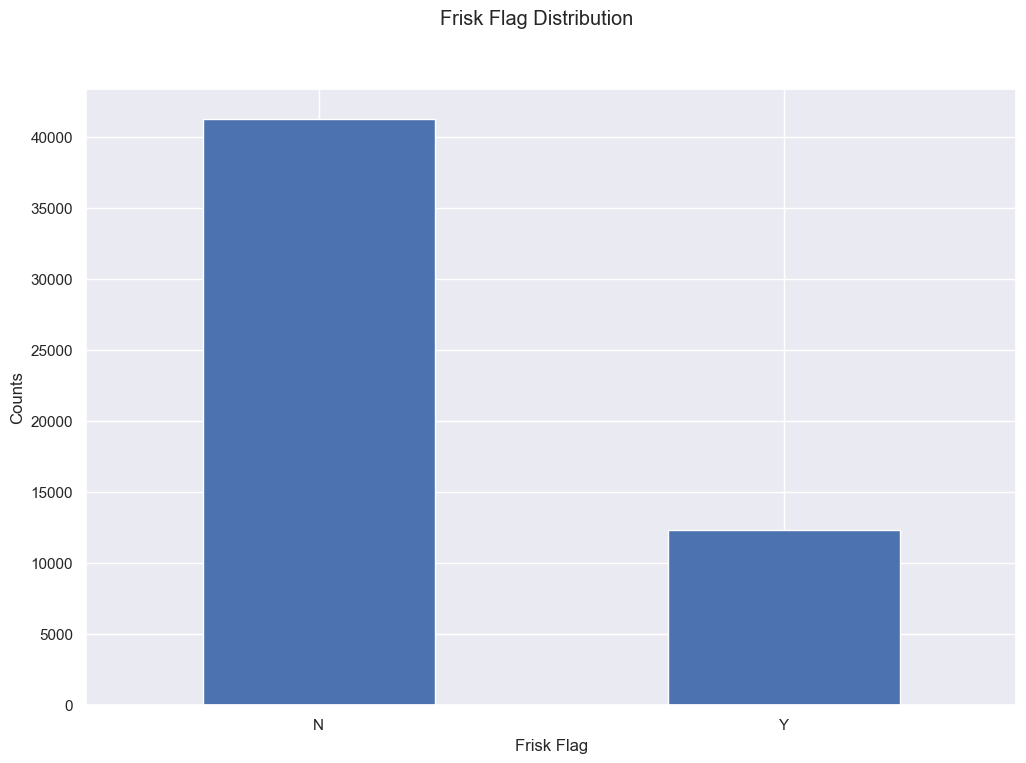

In [82]:
plt.figure(figsize=(12,8))
terry_stops['frisk_flag'].value_counts().plot(kind='bar')
plt.suptitle("Frisk Flag Distribution")
plt.xlabel("Frisk Flag")
plt.ylabel("Counts")
plt.xticks(rotation=0)
plt.show()

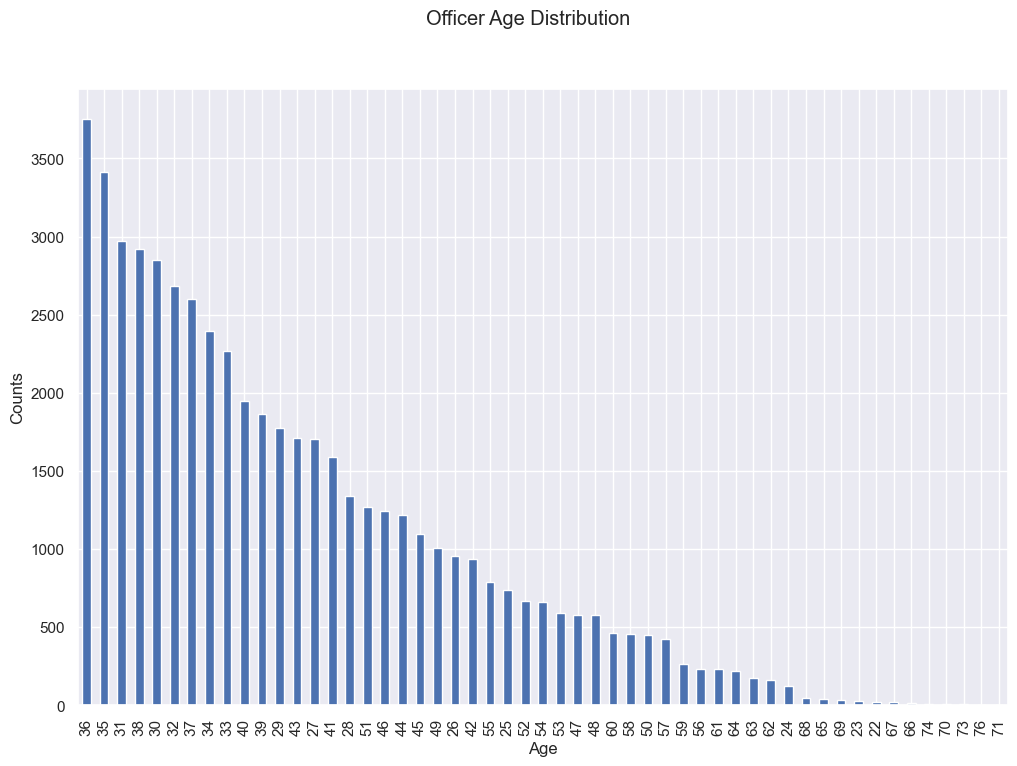

In [84]:
plt.figure(figsize=(12,8))
terry_stops['officer_age'].value_counts().plot(kind='bar')
plt.suptitle("Officer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Counts")
plt.show()